## Ecommerce - Clothing - Linear Regression Project
#### Aim:
* To figure out which variable has the greatest effect of 'Yearly Amount Spent'.
* To create a linear regression model which can correctly predict 'Yearly Amount Spent'.

In [28]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

<AxesSubplot:>

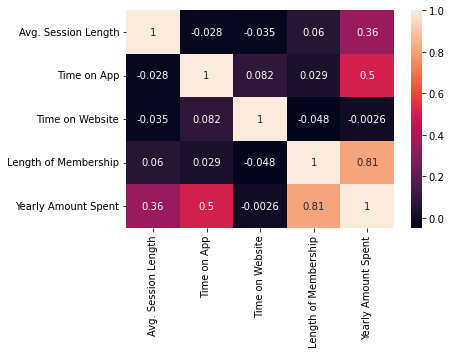

In [6]:
sns.heatmap(df.corr(), annot = True)

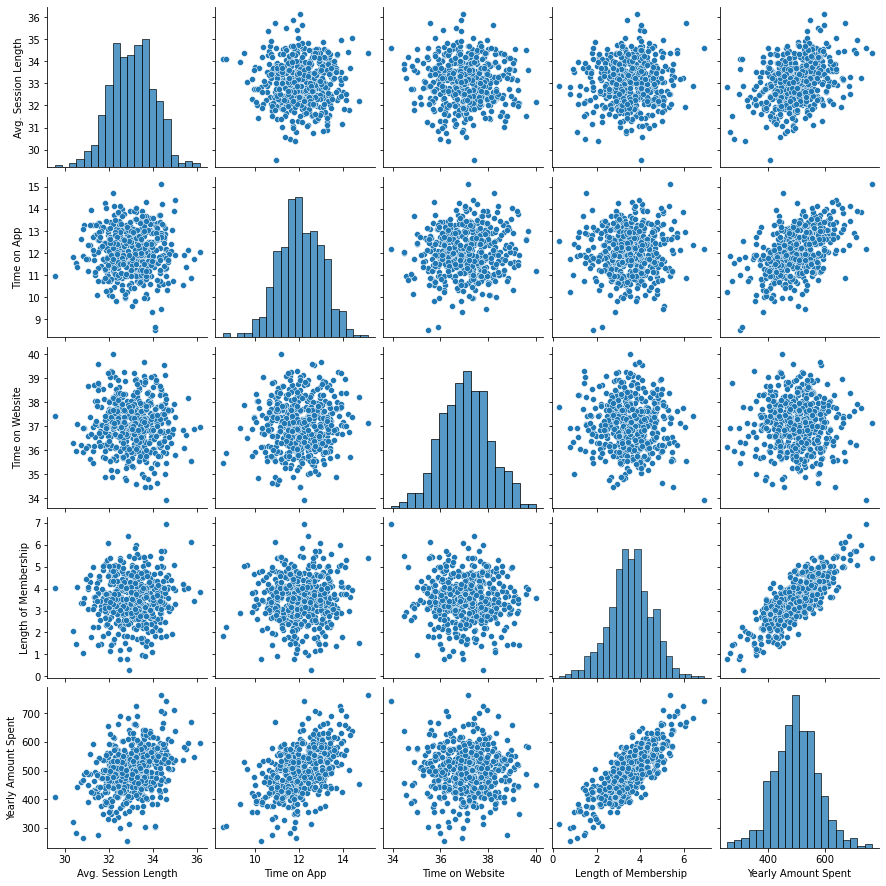

In [7]:
sns.pairplot(df)

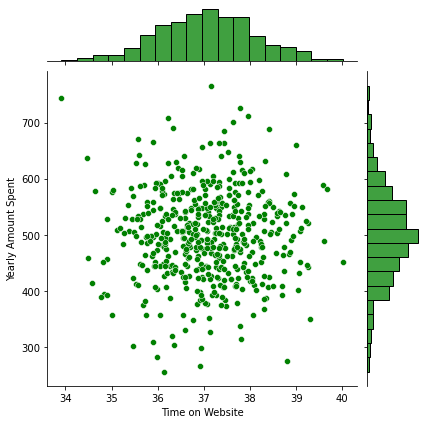

In [8]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = df, color = 'green')

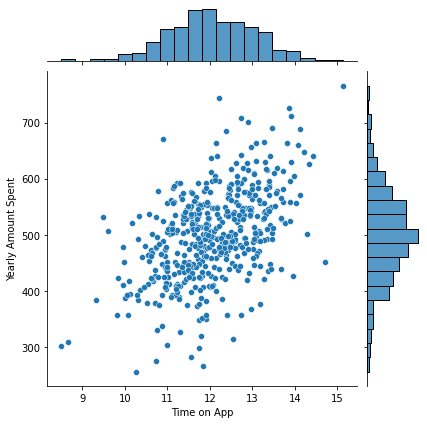

In [9]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = df)

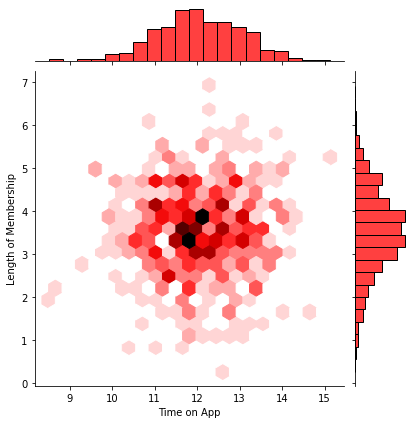

In [10]:
sns.jointplot(kind='hex', data = df, x = 'Time on App', y = 'Length of Membership', color='red')

### We can conclude that 'Lenght of Membership' and 'Time on app' are the most correlated columns to 'Yearly Amount Spent' respectively.

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

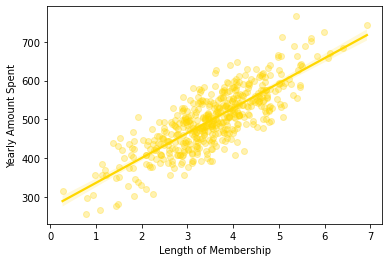

In [11]:
sns.regplot(data = df, x = 'Length of Membership', y = 'Yearly Amount Spent', color='gold', scatter_kws={'alpha':0.30})

## Model Building

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df[['Yearly Amount Spent']]

In [14]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
# Checking the y-intercept for the Linear Model
lm.intercept_

array([-1060.55080962])

In [18]:
# Checking the coefficients for the linear model
lm.coef_

array([[25.88815047, 38.87046474,  0.47066154, 61.78369022]])

In [19]:
# Creating dataframe for the model coefficients
coefficients = pd.DataFrame(index = X.columns, columns = ['coefficients'], data = lm.coef_.T)

In [20]:
coefficients

,coefficients
Avg. Session Length,25.888150
Time on App,38.870465
Time on Website,0.470662
Length of Membership,61.783690


* An unit change in 'Length of Membership' causes change of  **61.78** dollars spent per year.

* An unit change in 'Time on App' causes change of **38.87** dollars spent per year.

### We once again conclude that an unit change in 'Length of Membership' causes the greatest effect on the 'Yearly Amount Spent'.

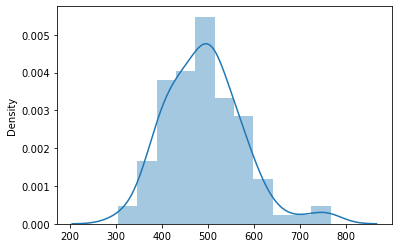

In [30]:
# Predictions
predictions = lm.predict(X_test)
sns.distplot(predictions)
plt.show()

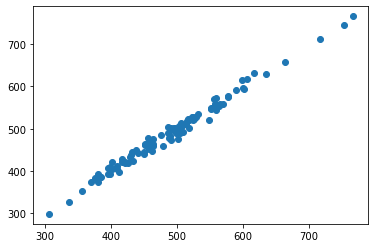

In [34]:
plt.scatter(predictions, y_test)
plt.show()

In [23]:
print('R-sqaured value for the lm is: ', lm.score(X_test, y_test))
print('Mean squared error:      ', mean_squared_error(predictions, y_test))
print('Root mean squared error: ', np.sqrt(mean_squared_error(predictions, y_test)))
print('Mean absolute error:     ', mean_absolute_error(predictions, y_test))

R-sqaured value for the lm is:  0.9861924261981547
Mean squared error:       92.89010304498504
Root mean squared error:  9.637951185028125
Mean absolute error:      7.645674798915268


* R-squared value: **0.9861924261981547**


* MSE: **92.89010304498504**


* RMSE: **9.637951185028125**


* MAE: **7.645674798915268**

### We can conclude that the model predicts the target variable i.e. 'Yearly Amount Spent' very well.